<a href="https://colab.research.google.com/github/Keita062/work/blob/main/Text_to_grapf(12_16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

In [23]:
sentences = ["Son Goku is a Saiyan", "Saiyans can become Super Saiyans", "Vegeta becomes a Super Saiyan", "Vegeta calls Son Goku Kakarot","Apple"]

In [24]:
# 文書埋め込み
model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
embeddings = model.encode(sentences)

In [26]:
# コサイン類似度
similarity = cosine_similarity(embeddings)

In [27]:
!pip install japanize-matplotlib

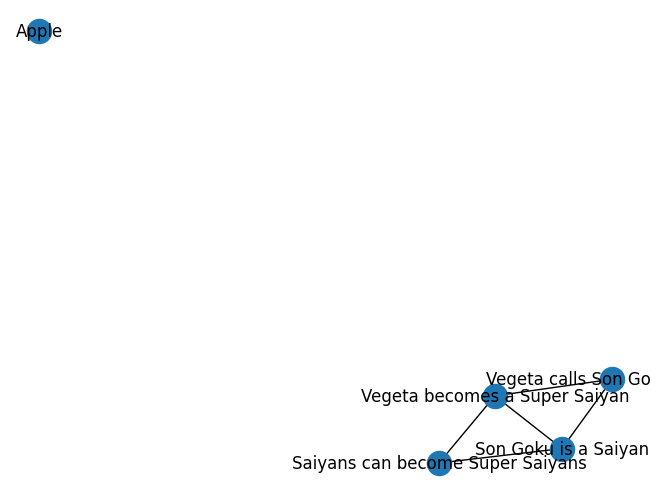

In [28]:
# グラフ作成
G = nx.Graph()
for i, sentence in enumerate(sentences):
    G.add_node(i, label=sentence)
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if similarity[i, j] > 0.5:
            G.add_edge(i, j, weight=similarity[i, j])

# 描画
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
plt.show()